In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import homogeneity_score

In [12]:
data = np.array(pd.read_csv('~/DataSet3/1.csv'))

In [13]:
data1=data[:,1:4]
true_labels = data[:,-1]
true_labels

array([1., 1., 1., ..., 7., 7., 0.])

**Scalling data to normalize the effect of each dimention and also reduce effect of outliers**

In [14]:
scaler = StandardScaler()
scaler.fit(data1)
sample_transformed = scaler.transform(data1)
print(scaler.mean_)

[1910.67337231 2380.28738462 2041.21414154]


**Elbow implementation with Homogenity score validation matrix**

In [15]:
homogenity={}
#true_labels=np.array(df["species"])
K = range(1,10)
for k in K :
    homogenity[k]=0
    kmeansModel = KMeans(n_clusters=k)
    labels= kmeansModel.fit_predict(sample_transformed)
    centers = kmeansModel.cluster_centers_
    sample_transformed = kmeansModel.fit_transform(sample_transformed)
    print(labels)
    #print(sample_transformed)
    homogenity[k]= homogeneity_score(true_labels,labels)
    print("score ="+str(homogenity[k]))

[0 0 0 ... 0 0 0]
score =-7.574203196595678e-16
[1 1 1 ... 0 0 0]
score =0.2071939590173806
[2 2 2 ... 0 0 0]
score =0.2820183869176377
[3 3 3 ... 0 0 0]
score =0.288057836154719
[3 3 3 ... 0 0 0]
score =0.29874668590208026
[3 3 3 ... 1 1 1]
score =0.2962741021175392
[1 6 6 ... 4 4 4]
score =0.24478857641411392
[7 2 2 ... 6 6 6]
score =0.22943868638518072
[5 1 1 ... 6 6 6]
score =0.2189712922730278


In [17]:
SSE_array=[]
slope=[]
for key,value in homogenity.items():
    SSE_array.append(value)
print(SSE_array)

#Calculate slope of each line
for p in range(1,9):
    s= (SSE_array[p]-SSE_array[p-1])
    slope.append([p+1,s])
#slope

[-7.574203196595678e-16, 0.2071939590173806, 0.2820183869176377, 0.288057836154719, 0.29874668590208026, 0.2962741021175392, 0.24478857641411392, 0.22943868638518072, 0.2189712922730278]


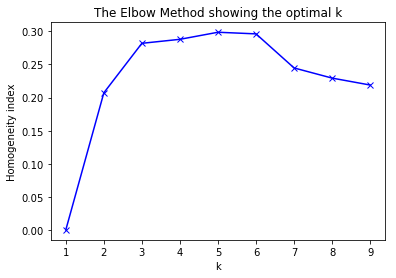

In [19]:
plt.plot(K,SSE_array,'bx-')
plt.xlabel('k')
plt.ylabel('Homogeneity index')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [20]:
slope

[[2, 0.20719395901738136],
 [3, 0.07482442790025709],
 [4, 0.006039449237081329],
 [5, 0.010688849747361229],
 [6, -0.0024725837845410714],
 [7, -0.05148552570342527],
 [8, -0.015349890028933194],
 [9, -0.010467394112152917]]

In [21]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,7):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope < 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 3
Optimal Number of Clusters = 6
Optimal Number of Clusters = 7
